In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
deudaPais = pd.read_table('data.csv',sep=',')

In [3]:
deudaPais.head(2)

,"﻿""Country Name""",Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print deudaPais.columns
print '--------------------------------'
print deudaPais.shape

Index([u'﻿"Country Name"', u'Country Code', u'Indicator Name',
       u'Indicator Code', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016', u'2017', u'2018', u'2019', u'2020', u'2021', u'2022', u'2023',
       u'2024', u'Unnamed: 59'],
      dtype='object')
--------------------------------
(28034, 60)


In [5]:
deudaPais.rename(columns={'﻿"Country Name"' :'Country', 'Country Code':'Code', 'Indicator Name':'IndiName',\
                          'Indicator Code':'IndiCode'},inplace=True)

In [6]:
deudaPais.head(2)

,Country,Code,IndiName,IndiCode,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Obtener los datos del período 2000-2010 de la deuda externa (DT.DOD.DECT.CD (http://DT.DOD.DECT.CD)) por países ("Country Name"), transponer las columnas a filas y dibujar las series. ¿La visualización nos dice algo? ¿Es adecuada?

In [7]:
deudaExternaPais = deudaPais.copy()
deudaExternaPais = deudaExternaPais[deudaExternaPais.IndiCode=='DT.DOD.DECT.CD'].groupby('Country').sum()\
.loc[:,'2000':'2010']
deudaExternaPais = deudaExternaPais.T
#plt.plot(deudaExternaPais/1e12);
deudaExternaPais
# revisar funcion pd.melt

Country,Afghanistan,Albania,Algeria,All developing countries,Angola,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,...,Turkmenistan,Uganda,Ukraine,Upper middle income,Uzbekistan,Vanuatu,Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
2000,NaN,1.122296e+09,2.547693e+10,1.742960e+12,9.763470e+09,1.009643e+09,1.524261e+09,1.559607e+10,2.604108e+09,5.279020e+08,...,2.509436e+09,3.535146e+09,1.389009e+10,1.043220e+12,4.979871e+09,95670000.0,1.285928e+10,5.162399e+09,5.811476e+09,3.832043e+09
2001,NaN,1.154850e+09,2.276389e+10,1.756875e+12,8.776913e+09,1.401649e+09,1.459853e+09,1.492421e+10,2.780349e+09,5.978810e+08,...,2.229529e+09,3.768223e+09,2.218211e+10,1.076943e+12,5.208444e+09,92032000.0,1.261666e+10,5.197891e+09,6.189777e+09,3.644778e+09
2002,NaN,1.181526e+09,2.304022e+10,1.820742e+12,9.110398e+09,1.711690e+09,1.626957e+09,1.663286e+10,3.378292e+09,6.973290e+08,...,2.060367e+09,4.014527e+09,2.342315e+10,1.116698e+12,5.151824e+09,112584000.0,1.334681e+10,5.337942e+09,6.674671e+09,3.978768e+09
2003,NaN,1.552159e+09,2.377485e+10,1.953504e+12,9.099853e+09,1.994268e+09,1.876746e+09,1.838549e+10,3.760979e+09,9.095300e+08,...,1.889766e+09,4.565233e+09,2.574826e+10,1.194071e+12,5.295598e+09,121146000.0,1.595835e+10,5.524634e+09,6.874318e+09,4.603900e+09
2004,NaN,1.606136e+09,2.242665e+10,2.081974e+12,9.786141e+09,2.106357e+09,2.019786e+09,1.965923e+10,4.584153e+09,9.278910e+08,...,1.630781e+09,4.769348e+09,3.068915e+10,1.294476e+12,5.215731e+09,145931000.0,1.799307e+10,5.616361e+09,7.540235e+09,4.953634e+09
2005,NaN,2.101163e+09,1.709240e+10,2.089796e+12,1.222396e+10,1.968027e+09,2.118242e+09,1.844882e+10,5.283532e+09,9.888200e+08,...,1.157800e+09,4.436715e+09,3.370593e+10,1.343201e+12,4.655813e+09,105348000.0,1.903868e+10,5.500561e+09,5.458981e+09,4.444631e+09
2006,9.691970e+08,2.465359e+09,5.910801e+09,2.267447e+12,9.890494e+09,2.136305e+09,2.687517e+09,2.010578e+10,6.543942e+09,1.023887e+09,...,9.910510e+08,1.276225e+09,5.248666e+10,1.507680e+12,4.487901e+09,107584000.0,1.864855e+10,5.705769e+09,2.375621e+09,4.908101e+09
2007,2.012885e+09,2.897759e+09,6.134509e+09,2.693260e+12,1.193168e+10,3.078652e+09,3.728508e+09,2.137264e+10,1.248816e+10,1.048500e+09,...,8.537490e+08,1.628567e+09,7.892908e+10,1.811890e+12,4.647813e+09,123899000.0,2.328472e+10,6.152424e+09,2.857153e+09,5.707379e+09
2008,2.133805e+09,4.238095e+09,6.246392e+09,2.908884e+12,1.550157e+10,3.609238e+09,4.465748e+09,2.292939e+10,1.512151e+10,1.252490e+09,...,7.457210e+08,2.268362e+09,9.826630e+10,1.942263e+12,5.108326e+09,150881000.0,2.648763e+10,6.318635e+09,3.079658e+09,5.710814e+09
2009,2.469925e+09,4.310066e+09,7.405467e+09,3.175081e+12,1.701427e+10,4.932598e+09,4.754598e+09,2.459598e+10,2.205383e+10,1.270864e+09,...,6.614750e+08,2.738678e+09,1.043271e+11,2.102098e+12,6.961540e+09,155309000.0,3.308383e+10,6.734195e+09,3.774356e+09,6.000141e+09


Para este punto, solo podemos visualizar que cada pais a medida que transcurre año a año, la deuda aumenta poco a poco, sin embargo en algunos paises esa deuda aumenta en menor medida que en otros.

#### Obtener los cuatro países de mayor deuda en 2010 y los cuatro de menos (descartar previamente lo que no sean países sino agrupaciones de países). Volver a dibujar como en el apartado anterior, pero solo los ocho seleccionados.

#### Top 4 con menos Deuda Externa

In [8]:
deudaExternaPais2 = deudaExternaPais.loc['2010',:].reset_index()
cols = ['Country','Code']
codigo = deudaPais[deudaPais.IndiCode=='DT.DOD.DECT.CD'][cols]
unionPaises = pd.merge(deudaExternaPais2,codigo,how='left',on='Country')
unionPaises.sort_values('2010',ascending=True).head(4)

,Country,2010,Code
118,Tonga,153651000.0,TON
126,Vanuatu,173330000.0,VUT
99,Sao Tome and Principe,180881000.0,STP
103,Solomon Islands,230757000.0,SLB


#### Top 4 con más Deuda Externa

In [9]:
unionPaises[~unionPaises.Country.str.contains('All|Lower|East|Middle|Latin|Europe|Asia|Upper')]\
.sort_values('2010',ascending=False).head(4)

,Country,2010,Code
24,China,5.597721e+11,CHN
15,Brazil,3.523644e+11,BRA
120,Turkey,2.991132e+11,TUR
53,India,2.916505e+11,IND


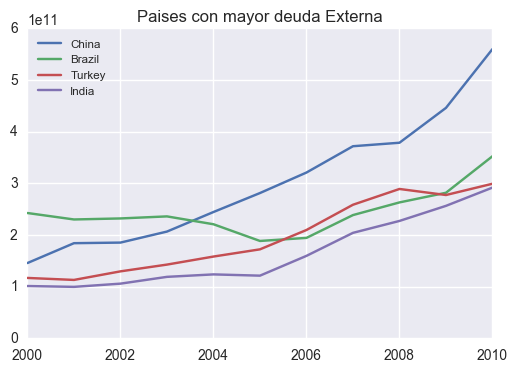

In [10]:
colsMayor = ['China','Brazil','Turkey','India']
colsMenor = ['Tonga', 'Vanuatu','Sao Tome and Principe', 'Solomon Islands']
#deudaExternaPais[cols]
plt.plot(deudaExternaPais[colsMayor]);
plt.legend(colsMayor,loc=0,fontsize='small');
plt.title('Paises con mayor deuda Externa');

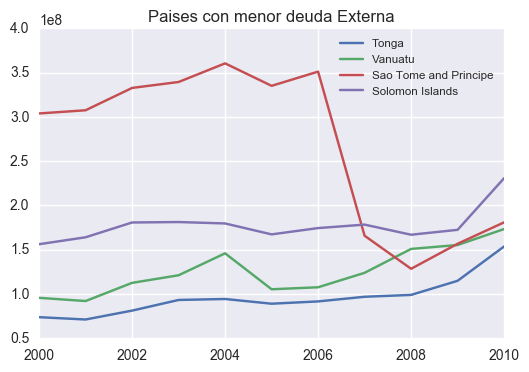

In [11]:
plt.plot(deudaExternaPais[colsMenor]);
plt.legend(colsMenor,loc=0,fontsize='small');
plt.title('Paises con menor deuda Externa');

#### Conseguir en Internet la población de los países anteriores (copiar los valores "a mano" en un fichero de texto, y fusionarlos con la tabla existente mediante el "Country Code".) y observar si hay correlación o algún tipo de relación entre la población y la deuda externa.

In [12]:
poblacion = pd.read_table('PoblacionPaises.txt',sep=';')

In [13]:
cols = ['Country','2010','censoPoblacion']
paisPoblacion = pd.merge(unionPaises,poblacion,how='inner',left_on='Code',right_on='codPais').sort_values('2010')
#paisPoblacion.censoPoblacion = pd.to_numeric(censoPoblacion)
paisPoblacion[cols]


,Country,2010,censoPoblacion
5,Tonga,1.536510e+08,103036
7,Vanuatu,1.733300e+08,206937
3,Sao Tome and Principe,1.808810e+08,193413
4,Solomon Islands,2.307570e+08,609833
2,India,2.916505e+11,1210193422
6,Turkey,2.991132e+11,79414269
0,Brazil,3.523644e+11,204450649
1,China,5.597721e+11,1339724852


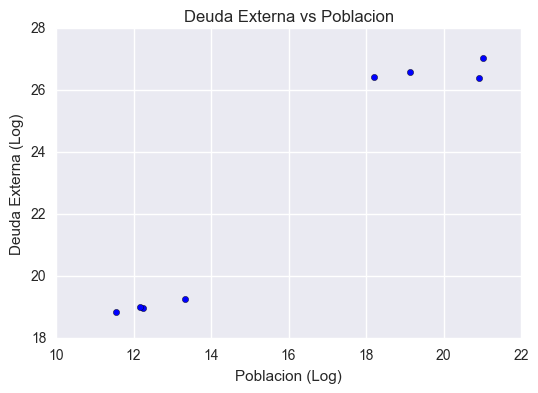

In [14]:
from scipy import stats
names = np.asarray(paisPoblacion.Country)
plt.scatter(np.log(paisPoblacion.censoPoblacion), np.log(paisPoblacion['2010']));
plt.title('Deuda Externa vs Poblacion');
plt.xlabel('Poblacion (Log)');
plt.ylabel('Deuda Externa (Log)');

 #### Conclusion: A menos poblacion menor deuda externa y a mayor población mayor deuda externa

#### Calcular el ratio de deuda externa con el Gross national income (GNI) para todos los países y obtener los países que tienen un ratio más alto en la media de los años 2000 a 2010.

#### Gross national income (GNI) = NY.GNP.MKTP.CD, como se muestra en la pagina 17 del siguiente link http://databank.worldbank.org/data/download/site-content/ids2015.pdf

#### Procedemos a crear dos tablas donde nos permita realizar la operacion de division para sacar el ratio por cada pais y año

In [15]:
cols = ['Country'] + list(deudaPais.loc[:,'2000':'2010'])
grupoGNI = deudaPais[deudaPais.IndiCode == 'NY.GNP.MKTP.CD'].sort_values(['Country'])[cols]
grupoDeudaExter = deudaPais[deudaPais.IndiCode=='DT.DOD.DECT.CD'].sort_values(['Country'])[cols]

grupoGNI.head(3)

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
56,Afghanistan,NaN,2.461666e+09,4.119884e+09,4.576561e+09,5.293545e+09,6.286221e+09,7.100902e+09,9.873623e+09,1.023353e+10,1.254085e+10,1.599880e+10
270,Albania,3.790485e+09,4.236568e+09,4.576969e+09,5.819788e+09,7.646347e+09,8.541042e+09,9.346567e+09,1.099809e+10,1.294574e+10,1.185314e+10,1.180746e+10
484,Algeria,5.208006e+10,5.314930e+10,5.456822e+10,6.540918e+10,8.181077e+10,9.861109e+10,1.126049e+11,1.331946e+11,1.697062e+11,1.359970e+11,1.609964e+11


In [16]:
grupoGNI.head(3)

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
56,Afghanistan,NaN,2.461666e+09,4.119884e+09,4.576561e+09,5.293545e+09,6.286221e+09,7.100902e+09,9.873623e+09,1.023353e+10,1.254085e+10,1.599880e+10
270,Albania,3.790485e+09,4.236568e+09,4.576969e+09,5.819788e+09,7.646347e+09,8.541042e+09,9.346567e+09,1.099809e+10,1.294574e+10,1.185314e+10,1.180746e+10
484,Algeria,5.208006e+10,5.314930e+10,5.456822e+10,6.540918e+10,8.181077e+10,9.861109e+10,1.126049e+11,1.331946e+11,1.697062e+11,1.359970e+11,1.609964e+11


In [17]:
grupoGNI.index = np.arange(0,len(grupoGNI))
grupoDeudaExter.index = np.arange(0,len(grupoDeudaExter))
ratios = grupoDeudaExter.loc[:,'2000':'2010']/grupoGNI.loc[:,'2000':'2010']
ratios['Country'] = grupoGNI.Country
ratios = ratios.set_index('Country').T
ratios

Country,Afghanistan,Albania,Algeria,All developing countries,Angola,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,...,Turkmenistan,Uganda,Ukraine,Upper middle income,Uzbekistan,Vanuatu,Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
2000,NaN,0.296082,0.489188,0.346282,1.310752,0.513954,0.305621,0.283041,0.205207,0.677796,...,0.920089,0.580904,0.458124,0.286127,0.367752,0.369361,0.387403,0.582487,1.687168,0.605482
2001,NaN,0.272591,0.428301,0.347590,1.190077,0.642097,0.271776,0.268277,0.225971,0.742902,...,0.650052,0.665789,0.594020,0.294078,0.465191,0.362435,0.361986,0.567266,1.575209,0.565316
2002,NaN,0.258146,0.422228,0.340905,0.838687,0.694527,0.278050,0.292276,0.231925,0.805979,...,0.474769,0.664155,0.560538,0.289893,0.539856,0.448398,0.357019,0.540555,1.650781,0.655229
2003,NaN,0.266704,0.363479,0.325030,0.730181,0.687310,0.274627,0.293772,0.210693,1.009611,...,0.320330,0.735710,0.519621,0.278197,0.528919,0.404778,0.379165,0.513862,1.444548,0.835900
2004,NaN,0.210053,0.274128,0.296037,0.570380,0.571753,0.253106,0.289424,0.197874,0.985958,...,0.242267,0.617341,0.478887,0.255212,0.435336,0.421356,0.370433,0.448359,1.295034,0.897064
2005,NaN,0.246008,0.173331,0.252795,0.504506,0.385398,0.182624,0.254394,0.174572,0.989041,...,0.153527,0.507150,0.395811,0.223465,0.325964,0.285466,0.336520,0.363333,0.708946,0.810973
2006,0.136489,0.263772,0.052492,0.231943,0.279222,0.319496,0.146840,0.265002,0.177597,0.937488,...,0.099335,0.131641,0.495012,0.212605,0.265788,0.256678,0.287141,0.319719,0.205002,0.956548
2007,0.203865,0.263478,0.046057,0.223250,0.226718,0.317265,0.133300,0.252274,0.278351,0.926573,...,0.069412,0.135075,0.561365,0.206845,0.199971,0.248413,0.309458,0.252597,0.228345,1.157830
2008,0.208511,0.327374,0.036807,0.203572,0.220661,0.292167,0.102458,0.232351,0.252175,1.040751,...,0.040894,0.162251,0.550658,0.183488,0.172252,0.250129,0.275394,0.221007,0.186507,1.437647
2009,0.196950,0.363622,0.054453,0.220823,0.249115,0.547658,0.116613,0.222381,0.458548,1.019699,...,0.034892,0.163973,0.908870,0.199108,0.206489,0.264656,0.326116,0.245972,0.253149,0.696314


#### Top 5 mayor ratio Deuda Externa/ GNI

In [18]:
np.mean(ratios).sort_values(ascending=False).head()

Country
Liberia                  7.385635
Sao Tome and Principe    2.390393
Guinea-Bissau            1.879192
Congo, Rep.              1.494459
Guyana                   1.359730
dtype: float64

Liberia lidera el Ranking de Ratio con mayor deuda / GNI, con un ratio: 7.38, lo cual quiere decir que deben 7.38 veces su ingreso bruto nacional, segudo por Sao Tome and Principe que debe 2.39 veces su ingreso.

#### [parte libre] Buscar y comentar alguna relación entre agregados económicos de los que aparecen en el dataset (excluyendo el GNI) y algún componente de la deuda. Utilizar correlaciones y en su caso modelos lineales básicos.

1. Exports of goods, services, and primary income = BX.GSR.TOTL.CD
1. Personal transfers and compensation of employees = BX.TRF.PWKR.CD.DT
1. Imports of goods, services, and primary income = BM.GSR.TOTL.CD
1. Primary income on FDI (payments) = BX.KLT.DREM.CD.DT
1. International reserves = FI.RES.TOTL.CD

In [19]:
cols = ['Country'] + list(deudaPais.loc[:,'2000':'2010'])
grupoExports = deudaPais[deudaPais.IndiCode == 'BX.GSR.TOTL.CD'].sort_values(['Country'])[cols]
grupoEmployees = deudaPais[deudaPais.IndiCode == 'BX.TRF.PWKR.CD.DT'].sort_values(['Country'])[cols]
grupoImports = deudaPais[deudaPais.IndiCode == 'BM.GSR.TOTL.CD'].sort_values(['Country'])[cols]
grupoPayments = deudaPais[deudaPais.IndiCode == 'BX.KLT.DREM.CD.DT'].sort_values(['Country'])[cols]
grupoIntReserves = deudaPais[deudaPais.IndiCode == 'FI.RES.TOTL.CD'].sort_values(['Country'])[cols]

In [20]:
grupoExports.index = range(0,len(grupoExports))
grupoEmployees.index = range(0,len(grupoEmployees))
grupoImports.index = range(0,len(grupoImports))
grupoPayments.index = range(0,len(grupoPayments))
grupoIntReserves.index = range(0,len(grupoIntReserves))

In [21]:
#Si se presenta error, correr nuevamente desde dos pasos atras
grupoExports = grupoExports.set_index('Country').T
grupoEmployees = grupoEmployees.set_index('Country').T
grupoImports = grupoImports.set_index('Country').T
grupoPayments = grupoPayments.set_index('Country').T
grupoIntReserves = grupoIntReserves.set_index('Country').T
grupoDeudaExter1 = grupoDeudaExter.set_index('Country').T

### Para este ejercico Country = 'Colombia'

#### modelos de regresión lineal y correalción

#### Deuda Externa vs. Trans. y Comp. Empleados - Colombia

In [22]:

slope, intercept, rvalue, pvalue, stderr = stats.linregress(grupoDeudaExter1.Colombia, grupoEmployees.Colombia)
y1 = grupoDeudaExter1.Colombia * slope + intercept
correlacion = np.corrcoef(grupoDeudaExter1.Colombia, grupoEmployees.Colombia)
print 'Modelo Regresion y correlacion para Colombia'
print '----------------------------------------------'
print 'Correlacion: ', correlacion[0,1]
print 'Rvalue: ', rvalue**2
print 'Pvalue: ', pvalue
print '----------------------------------------------'
print 'Podemos notar que hay una buena correlacion entre estas dos variables, sin embargo el pvalue nos dice que la regresion lineal no es un modelo predictivo'


Modelo Regresion y correlacion para Colombia
----------------------------------------------
Correlacion:  0.646957929327
Rvalue:  0.418554562319
Pvalue:  0.0314350670501
----------------------------------------------
Podemos notar que hay una buena correlacion entre estas dos variables, sin embargo el pvalue nos dice que la regresion lineal no es un modelo predictivo


#### Gráfico

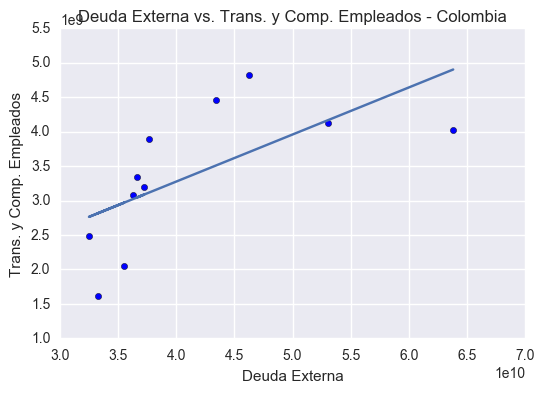

In [23]:
plt.scatter(grupoDeudaExter1.Colombia, grupoEmployees.Colombia);
plt.plot(grupoDeudaExter1.Colombia, y1)
plt.title('Deuda Externa vs. Trans. y Comp. Empleados - Colombia');
plt.xlabel('Deuda Externa');
plt.ylabel('Trans. y Comp. Empleados')

#### Deuda Externa vs. Expotaciones - Colombia

In [24]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(grupoDeudaExter1.Colombia, grupoExports.Colombia)
y2 = grupoDeudaExter1.Colombia * slope + intercept
correlacion = np.corrcoef(grupoDeudaExter1.Colombia, grupoExports.Colombia)
print 'Modelo Regresion y correlacion para Colombia'
print '----------------------------------------------'
print 'Correlacion: ', correlacion[0,1]
print 'Rvalue: ', rvalue**2
print 'Pvalue: ', pvalue
print '----------------------------------------------'
print 'Podemos notar que hay una buena correlacion entre estas dos variables, y este modelo de regresion lineal mejora frente al anterior, de igual manera el pvalue es menor al 5%'


Modelo Regresion y correlacion para Colombia
----------------------------------------------
Correlacion:  0.880208349267
Rvalue:  0.774766738119
Pvalue:  0.0003500500268
----------------------------------------------
Podemos notar que hay una buena correlacion entre estas dos variables, y este modelo de regresion lineal mejora frente al anterior, de igual manera el pvalue es menor al 5%


#### Gráfico

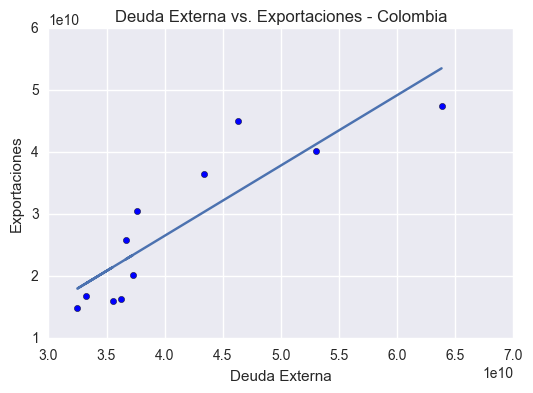

In [25]:
plt.scatter(grupoDeudaExter1.Colombia, grupoExports.Colombia);
plt.plot(grupoDeudaExter1.Colombia, y2)
plt.title('Deuda Externa vs. Exportaciones - Colombia');
plt.xlabel('Deuda Externa');
plt.ylabel('Exportaciones');

#### Deuda Externa vs. Importaciones - Colombia

In [26]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(grupoDeudaExter1.Colombia, grupoImports.Colombia)
y3 = grupoDeudaExter1.Colombia * slope + intercept
correlacion = np.corrcoef(grupoDeudaExter1.Colombia, grupoImports.Colombia)
print 'Modelo Regresion y correlacion para Colombia'
print '----------------------------------------------'
print 'Correlacion: ', correlacion[0,1]
print 'Rvalue: ', rvalue**2
print 'Pvalue: ', pvalue
print '----------------------------------------------'
print 'Este modelos de deuda Externa vs Importaciones, son muy parecidos, su analisis es igual'


Modelo Regresion y correlacion para Colombia
----------------------------------------------
Correlacion:  0.87673377624
Rvalue:  0.7686621144
Pvalue:  0.000396046521328
----------------------------------------------
Este modelos de deuda Externa vs Importaciones, son muy parecidos, su analisis es igual


#### Gráfico

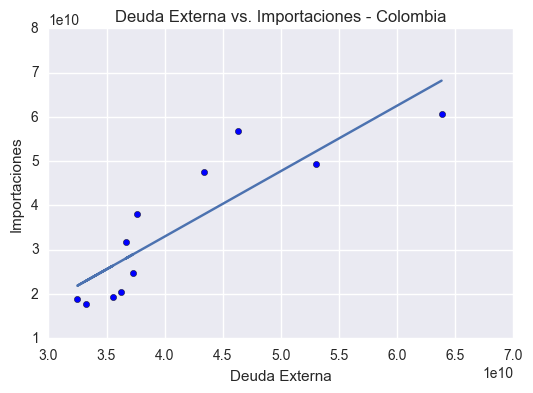

In [27]:
plt.scatter(grupoDeudaExter1.Colombia, grupoImports.Colombia);
plt.plot(grupoDeudaExter1.Colombia, y3)
plt.title('Deuda Externa vs. Importaciones - Colombia');
plt.xlabel('Deuda Externa');
plt.ylabel('Importaciones');

#### Deuda Externa vs. Reservas Internacionales - Colombia

In [28]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(grupoDeudaExter1.Colombia, grupoIntReserves.Colombia)
y4 = grupoDeudaExter1.Colombia * slope + intercept
correlacion = np.corrcoef(grupoDeudaExter1.Colombia, grupoIntReserves.Colombia)
print 'Modelo Regresion y correlacion para Colombia'
print '----------------------------------------------'
print 'Correlacion: ', correlacion[0,1]
print 'Rvalue: ', rvalue**2
print 'Pvalue: ', pvalue
print '----------------------------------------------'
print 'Este modelo el Rvalor muestra que es muy predictivo, y el pvalue es muy cercano a cero, el modelo es Excelente'


Modelo Regresion y correlacion para Colombia
----------------------------------------------
Correlacion:  0.934999672601
Rvalue:  0.874224387765
Pvalue:  2.42446970211e-05
----------------------------------------------
Este modelo el Rvalor muestra que es muy predictivo, y el pvalue es muy cercano a cero, el modelo es Excelente


#### Gráfico

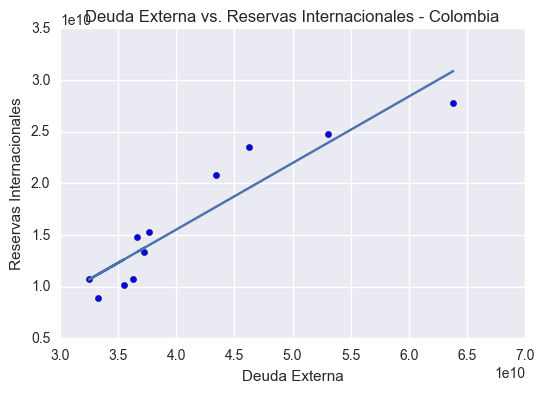

In [29]:
plt.scatter(grupoDeudaExter1.Colombia, grupoIntReserves.Colombia);
plt.plot(grupoDeudaExter1.Colombia, y4)
plt.title('Deuda Externa vs. Reservas Internacionales - Colombia');
plt.xlabel('Deuda Externa');
plt.ylabel('Reservas Internacionales');

#### Deuda Externa vs. Ingresos por Inversion Extranjera Directa - Colombia

In [30]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(grupoDeudaExter1.Colombia, grupoPayments.Colombia)
y5 = grupoDeudaExter1.Colombia * slope + intercept
correlacion = np.corrcoef(grupoDeudaExter1.Colombia, grupoPayments.Colombia)
print 'Modelo Regresion y correlacion para Colombia'
print '----------------------------------------------'
print 'Correlacion: ', correlacion[0,1]
print 'Rvalue: ', rvalue**2
print 'Pvalue: ', pvalue
print '----------------------------------------------'
print 'el Rvalue nos dice que este modelo predictivo y el Pvalue al ser menor al 5% es significativo'


Modelo Regresion y correlacion para Colombia
----------------------------------------------
Correlacion:  0.90309853812
Rvalue:  0.815586969555
Pvalue:  0.000139485471864
----------------------------------------------
el Rvalue nos dice que este modelo predictivo y el Pvalue al ser menor al 5% es significativo


#### Gráfico

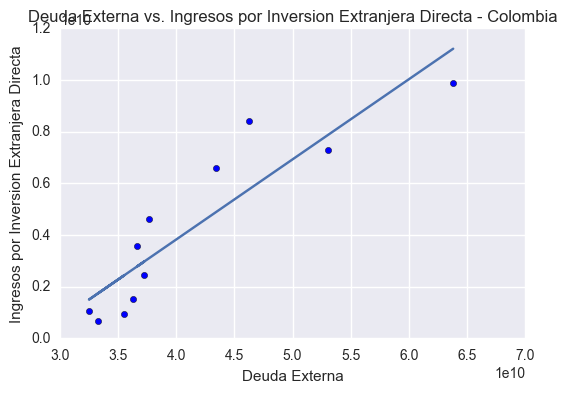

In [31]:
plt.scatter(grupoDeudaExter1.Colombia, grupoPayments.Colombia);
plt.plot(grupoDeudaExter1.Colombia, y5)
plt.title('Deuda Externa vs. Ingresos por Inversion Extranjera Directa - Colombia');
plt.xlabel('Deuda Externa');
plt.ylabel('Ingresos por Inversion Extranjera Directa');

Para el caso de Colombia, la deuda Externa tiene relacion directa con cada una de los agregados economicos, sin embargo tendriamos que revisar pais a pais si ocurre lo mismo.